## A.I. Assignment 4

## Learning Goals

By the end of this lab, you should be able to:
* Get familiar with tensors in pytorch
* Get familiar with the activation functions for ANN 
* Create a simple perceptron model with pytorch



## Common activation functions for ANN:

##### Sigmoid:

The sigmoid function is a popular choice for activation functions in neural networks. It has an $S-shaped$ curve:
$$f(x) = \frac{1}{1+e^{-x}}.$$

It has a number of appealing qualities:

1. *Nonlinearity*: Because the sigmoid function is nonlinear, it enables the neural network to simulate nonlinear interactions between inputs and outputs. A neural network would simply be a linear model without a nonlinear activation function like sigmoid, which would significantly restrict its capacity to describe complex relationships.

1. *Smoothness*: As the sigmoid function is differentiable and smooth, its derivative exist at every point. This is significant because it makes it possible for neural network training techniques based on gradients (such as backpropagation) to perform well.

1. *Boundedness*: The sigmoid function is bounded between 0 and 1, it means  its outputs can be interpreted as probabilities.  It is most useful in applications like binary classification, where the goal is to predict whether an input belongs to one of two classes.

1. *Monotonicity*: The sigmoid function is monotonic, which means that its outputs are always increasing or always decreasing with respect to its inputs. This makes it easy to interpret the effect of changes in input variables on the output of the network.

##### ReLU (Rectified Linear Unit):

The ReLU function is defined as $$f(x) = max(0, x).$$

It is a widely used activation function in deep learning due to its simplicity and effectiveness.

##### Tanh (Hyperbolic Tangent):

The $\tanh$ function is similar to the sigmoid function but produces outputs in the interval $[-1, 1]$:  
$$f(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}.$$

##### Softmax:

The softmax function is commonly used in the output layer of a neural network for multi-class classification problems. It normalizes the output into a probability distribution over the classes.

Given a vector $\vec{z}$ of $n$ real numbers, the softmax function calculates a vector $\vec{s}$ of $n$ real numbers with the components:
$$s_j = \frac{e^{z_j}}{\sum_{k=1}^{n} {e^{z_k}}}.$$


##### Leaky ReLU:

The Leaky ReLU is a variation of the ReLU function that introduces a small non-zero gradient for negative inputs. It is defined as 
$$f(x) = max(0.01 \cdot x, x).$$

##### ELU (Exponential Linear Unit):

The ELU function is another variation of the ReLU function that introduces a small negative saturation value for negative inputs. It is defined as 

$$ f(x) = \biggl\{ \begin{matrix} x, & for & x > 0 \\
                      \alpha \cdot (e^{x} - 1), & for & x \leq 0 \end{matrix}$$
where $\alpha$ is a hyperparameter.

##### Swish:

The Swish function is a recent activation function that is a smooth approximation of the ReLU function. It is defined as f(x) = x * sigmoid(x).

In [1]:
import torch
torch.cuda.is_available()

False

create a tensor with requires_grad=True to tell PyTorch to track gradients for this tensor:

In [2]:
x = torch.tensor([2.0], requires_grad=True)
print(x)

tensor([2.], requires_grad=True)


You can perform any operations on this tensor as usual:

In [3]:
y = x ** 2 + 2 * x + 1
print(y)

tensor([9.], grad_fn=<AddBackward0>)


To compute the gradients of y with respect to x, you need to call backward() on y:

In [4]:
y.backward()

In [5]:
x.grad

tensor([6.])

In [6]:
import torch

# Create a tensor with requires_grad=True
x = torch.tensor([1., 2., 3.], requires_grad=True)

# Compute a function of x
y = x.sum()

# Compute gradients of y with respect to x
y.backward()

# Print gradients of x
print(x.grad)


tensor([1., 1., 1.])


Exercise 1.

Compute the gradient for the sigmoid activation function in 2 points using pytorch and check it with the known explicit formula 

In [7]:
import torch
import math

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

# Define the explicit formula for the derivative of sigmoid
def sigmoid_derivative_explicit(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Define two points
x1 = torch.tensor(2.0, requires_grad=True)
x2 = torch.tensor(-1.5, requires_grad=True)

# Compute the gradient using PyTorch
y1 = sigmoid(x1)
y2 = sigmoid(x2)
y1.backward()
y2.backward()

# Print the gradients and compare with the explicit formula
print("Gradient at x1:", x1.grad.item())
print("Gradient at x2:", x2.grad.item())

# Compute the gradients using the explicit formula
grad_explicit_1 = sigmoid_derivative_explicit(x1)
grad_explicit_2 = sigmoid_derivative_explicit(x2)

print("Explicit Gradient at x1:", grad_explicit_1.item())
print("Explicit Gradient at x2:", grad_explicit_2.item())

Gradient at x1: 0.10499356687068939
Gradient at x2: 0.1491464525461197
Explicit Gradient at x1: 0.10499362647533417
Explicit Gradient at x2: 0.14914646744728088


Exercise 2.

Compute the gradient for the linear activation function in 2 points using pytorch and check it with the known explicit formula

In [8]:
import torch

# Define two points
x1 = torch.tensor(2.0, requires_grad=True)
x2 = torch.tensor(3.0, requires_grad=True)

# Compute the gradient using PyTorch
y1 = x1
y2 = x2
y1.backward()
y2.backward()

# Print the gradients and compare with the explicit formula
print("Gradient at x1:", x1.grad.item())
print("Gradient at x2:", x2.grad.item())

# The known explicit formula for the gradient of the linear function is 1.
explicit_gradient = 1

print("Explicit Gradient:", explicit_gradient)


Gradient at x1: 1.0
Gradient at x2: 1.0
Explicit Gradient: 1


Execise 3.

Compute the gradient for the relu activation function in 2 points using pytorch and check it with the known explicit formula.

In [9]:
import torch

# Define the ReLU function
def relu(x):
    return torch.max(torch.tensor(0.0), x)

# Define the explicit formula for the derivative of ReLU
def relu_derivative_explicit(x):
    return torch.where(x > 0, torch.tensor(1.0), torch.tensor(0.0))

# Define two points
x1 = torch.tensor(2.0, requires_grad=True)
x2 = torch.tensor(-1.5, requires_grad=True)

# Compute the ReLU activations
y1 = relu(x1)
y2 = relu(x2)

# Compute the gradient using PyTorch
y1.backward()
y2.backward()

# Print the gradients and compare with the explicit formula
print("Gradient at x1:", x1.grad.item())
print("Gradient at x2:", x2.grad.item())

# Compute the gradients using the explicit formula
grad_explicit_1 = relu_derivative_explicit(x1)
grad_explicit_2 = relu_derivative_explicit(x2)

print("Explicit Gradient at x1:", grad_explicit_1.item())
print("Explicit Gradient at x2:", grad_explicit_2.item())


Gradient at x1: 1.0
Gradient at x2: 0.0
Explicit Gradient at x1: 1.0
Explicit Gradient at x2: 0.0


Exercise 4. 

Write in python a function to plot the sigmoid activation function and its gradient using matplotlib

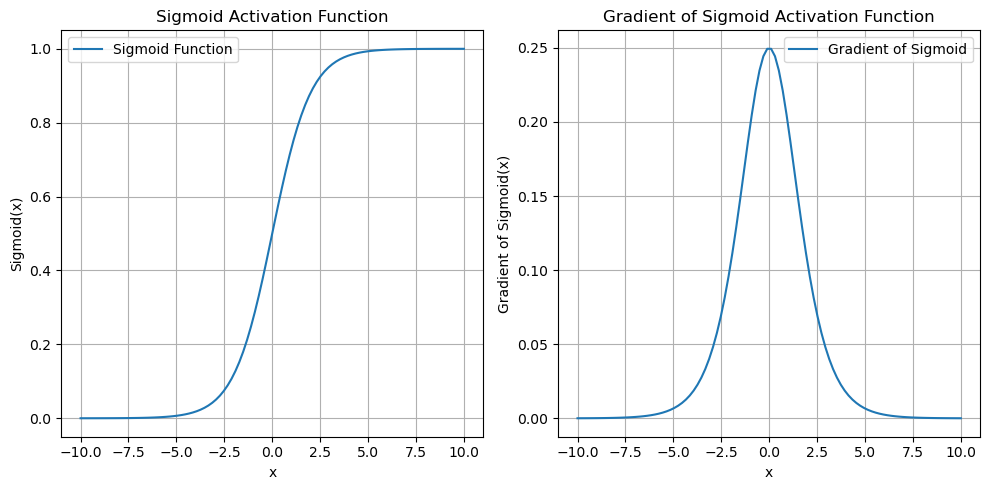

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Gradient of the sigmoid activation function
def sigmoid_gradient(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Range for x values
x = np.linspace(-10, 10, 100)

# Compute sigmoid values
y_sigmoid = sigmoid(x)

# Compute sigmoid gradient values
y_gradient = sigmoid_gradient(x)

# Plot the sigmoid function
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y_sigmoid, label='Sigmoid Function')
plt.title('Sigmoid Activation Function')
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.grid(True)
plt.legend()

# Plot the gradient of the sigmoid function
plt.subplot(1, 2, 2)
plt.plot(x, y_gradient, label='Gradient of Sigmoid')
plt.title('Gradient of Sigmoid Activation Function')
plt.xlabel('x')
plt.ylabel('Gradient of Sigmoid(x)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Exercise 5. 

Write in python a function to plot the ReLU activation function and its gradient using matplotlib.

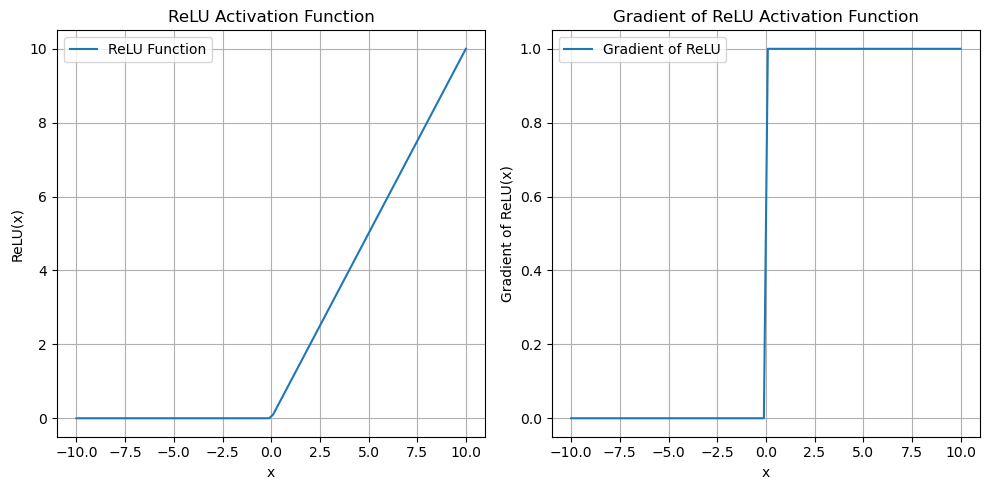

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Gradient of the ReLU activation function
def relu_gradient(x):
    return np.where(x > 0, 1, 0)

# Range for x values
x = np.linspace(-10, 10, 100)

# Compute ReLU values
y_relu = relu(x)

# Compute ReLU gradient values
y_gradient = relu_gradient(x)

# Plot the ReLU function
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y_relu, label='ReLU Function')
plt.title('ReLU Activation Function')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid(True)
plt.legend()

# Plot the gradient of the ReLU function
plt.subplot(1, 2, 2)
plt.plot(x, y_gradient, label='Gradient of ReLU')
plt.title('Gradient of ReLU Activation Function')
plt.xlabel('x')
plt.ylabel('Gradient of ReLU(x)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Exercise 6. 

Write in python a function to plot the tanh activation function and its gradient using matplotlib.

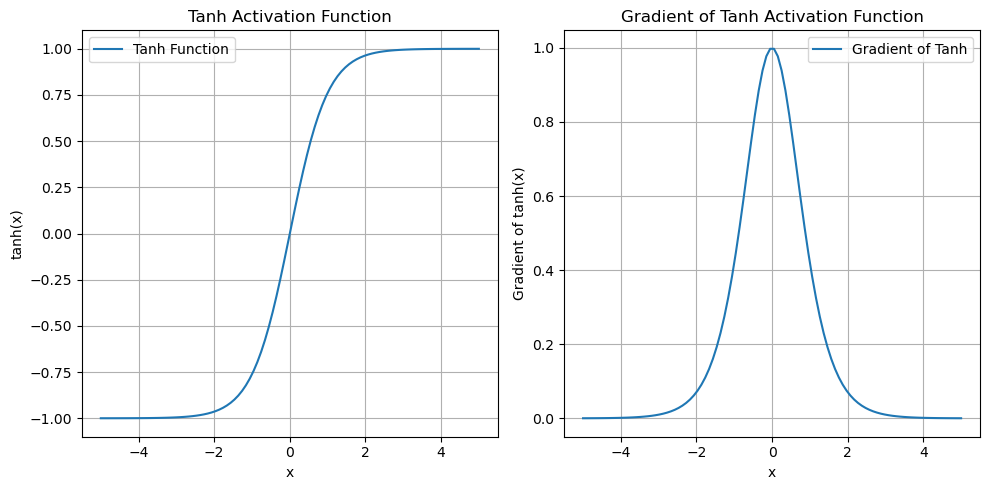

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Tanh activation function
def tanh(x):
    return np.tanh(x)

# Gradient of the tanh activation function
def tanh_gradient(x):
    return 1 - np.tanh(x)**2

# Range for x values
x = np.linspace(-5, 5, 100)

# Compute tanh values
y_tanh = tanh(x)

# Compute tanh gradient values
y_gradient = tanh_gradient(x)

# Plot the tanh function
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y_tanh, label='Tanh Function')
plt.title('Tanh Activation Function')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.grid(True)
plt.legend()

# Plot the gradient of the tanh function
plt.subplot(1, 2, 2)
plt.plot(x, y_gradient, label='Gradient of Tanh')
plt.title('Gradient of Tanh Activation Function')
plt.xlabel('x')
plt.ylabel('Gradient of tanh(x)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Exercise 7. 

Write in python a function to plot the leaky ReLU activation function and its gradient using matplotlib.

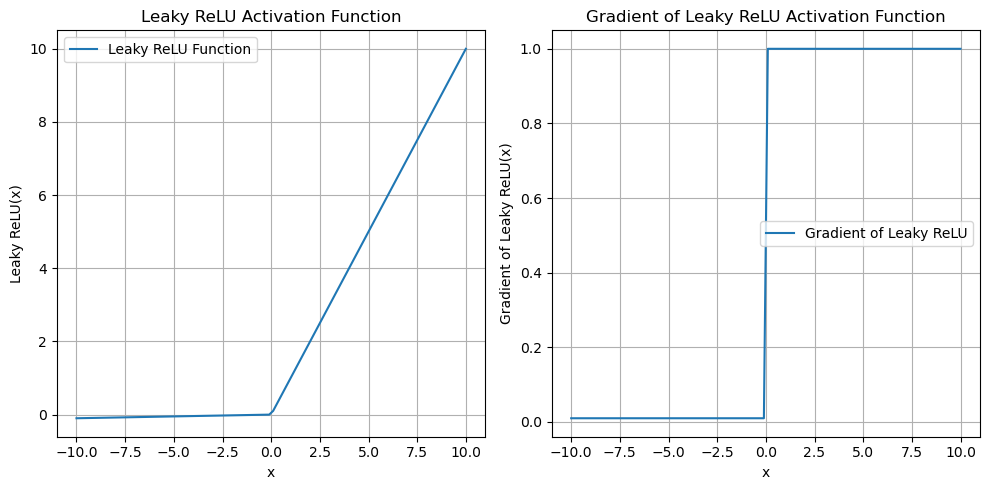

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Leaky ReLU activation function
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# Gradient of the Leaky ReLU activation function
def leaky_relu_gradient(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

# Range for x values
x = np.linspace(-10, 10, 100)

# Compute Leaky ReLU values
y_leaky_relu = leaky_relu(x)

# Compute Leaky ReLU gradient values
y_gradient = leaky_relu_gradient(x)

# Plot the Leaky ReLU function
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y_leaky_relu, label='Leaky ReLU Function')
plt.title('Leaky ReLU Activation Function')
plt.xlabel('x')
plt.ylabel('Leaky ReLU(x)')
plt.grid(True)
plt.legend()

# Plot the gradient of the Leaky ReLU function
plt.subplot(1, 2, 2)
plt.plot(x, y_gradient, label='Gradient of Leaky ReLU')
plt.title('Gradient of Leaky ReLU Activation Function')
plt.xlabel('x')
plt.ylabel('Gradient of Leaky ReLU(x)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


## Perceptron

We define a class called *Perceptron* that inherits from *torch.nn.Module*. 

In the constructor, we define a single fully-connected linear layer with $input_dim$ inputs and $output_dim$ outputs, and a $sigmoid$ activation function. In the forward method, we apply the linear transformation to the input $x$, and then apply the sigmoid activation function to the output.



In [5]:
import torch
import torch.nn as nn

input_size = 2
output_size = 1

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x


 We create an instance of this model and use it to make predictions like this:

In [6]:
perceptron = Perceptron(input_size, output_size)
x = torch.tensor([0.5, 0.2])
y = perceptron(x)
print(y)


tensor([0.3427], grad_fn=<SigmoidBackward0>)


In [7]:

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)  # Stochastic gradient descent optimizer

# Generate some random input data and labels
input_data = torch.randn((10, input_size))
labels = torch.randint(0, 2, (10, output_size)).float()

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.4346
Epoch [200/1000], Loss: 0.4012
Epoch [300/1000], Loss: 0.3874
Epoch [400/1000], Loss: 0.3800
Epoch [500/1000], Loss: 0.3756
Epoch [600/1000], Loss: 0.3728
Epoch [700/1000], Loss: 0.3709
Epoch [800/1000], Loss: 0.3696
Epoch [900/1000], Loss: 0.3687
Epoch [1000/1000], Loss: 0.3680


Exercise 8: 

Implement a binary classification model using the Perceptron class in PyTorch for the logic OR. 

Your task is to create a Perceptron instance and train it using a proper  dataset and the binary cross-entropy loss with stochastic gradient descent optimizer. 

Here are the steps you can follow:

Define a Perceptron class that inherits from torch.nn.Module and implements a binary classification model.

Define a binary cross-entropy loss function using the torch.nn.BCEWithLogitsLoss module.

Define a stochastic gradient descent optimizer using the torch.optim.SGD module.

Train the Perceptron model on the training set using the binary cross-entropy loss and stochastic gradient descent optimizer.

Evaluate the trained model compute the accuracy.


In [8]:
import torch
import torch.nn as nn

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim) # Linear layer
        self.activation = nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x

perceptron = Perceptron(2, 1) # 2 input features, 1 output neuron
criterion = nn.BCEWithLogitsLoss() # Binary cross-entropy loss
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1) # Stochastic gradient descent optimizer

inputs = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32) 
targets = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32) 

num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad() # Clear gradients
    outputs = perceptron(inputs) # Forward pass
    loss = criterion(outputs, targets) # Compute the loss
    loss.backward() # Backward pass
    optimizer.step() # Update the weights

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        
# Evaluate the model
with torch.no_grad():
    outputs = perceptron(inputs) # Forward pass
    predicted = (outputs > 0.5).float() # Convert the output to binary
    accuracy = (predicted == targets).float().mean() # Compute the accuracy
    print(f'Accuracy: {accuracy.item():.4f}')
    


Epoch [100/1000], Loss: 0.5478
Epoch [200/1000], Loss: 0.5392
Epoch [300/1000], Loss: 0.5324
Epoch [400/1000], Loss: 0.5261
Epoch [500/1000], Loss: 0.5200
Epoch [600/1000], Loss: 0.5139
Epoch [700/1000], Loss: 0.5079
Epoch [800/1000], Loss: 0.5021
Epoch [900/1000], Loss: 0.4967
Epoch [1000/1000], Loss: 0.4916
Accuracy: 1.0000
